**Tutorial Title: Understanding Treatment Effects Estimation Using R**

**Introduction:**

Welcome to this tutorial on estimating treatment effects using R. In this tutorial, we will explore various regression techniques to understand and analyze treatment effects. This knowledge is crucial in fields like economics, social sciences, and even agricultural economics, though our examples here will use more general datasets available in R.

Throughout this tutorial, we will use R, a powerful tool for statistical computing and graphics. By the end of this tutorial, you should be comfortable running basic and multiple regression analyses in R and understand how to interpret the results in the context of treatment effects.

**Setup:**

Before we begin, ensure you have R and RStudio installed on your computer. We will also require a few packages for this tutorial. Run the following commands in your R console to install them:


In [1]:
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("dplyr")
install.packages("MASS")

Installing package into 'C:/Users/Bob/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Bob\AppData\Local\Temp\Rtmp8QaUtn\downloaded_packages


Installing package into 'C:/Users/Bob/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Bob\AppData\Local\Temp\Rtmp8QaUtn\downloaded_packages


Installing package into 'C:/Users/Bob/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Bob\AppData\Local\R\win-library\4.5\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\Bob\AppData\Local\R\win-library\4.5\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"



The downloaded binary packages are in
	C:\Users\Bob\AppData\Local\Temp\Rtmp8QaUtn\downloaded_packages


Installing package into 'C:/Users/Bob/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'MASS' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'MASS'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Bob\AppData\Local\R\win-library\4.5\00LOCK\MASS\libs\x64\MASS.dll to C:\Users\Bob\AppData\Local\R\win-library\4.5\MASS\libs\x64\MASS.dll: Permission denied"
Warning message:
"restored 'MASS'"



The downloaded binary packages are in
	C:\Users\Bob\AppData\Local\Temp\Rtmp8QaUtn\downloaded_packages


Now, load the packages in your R session:

In [2]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(MASS)

Warning message:
"package 'tidyverse' was built under R version 4.5.2"
Warning message:
"package 'ggplot2' was built under R version 4.5.2"
Warning message:
"package 'tidyr' was built under R version 4.5.2"
Warning message:
"package 'readr' was built under R version 4.5.2"
Warning message:
"package 'purrr' was built under R version 4.5.2"
Warning message:
"package 'stringr' was built under R version 4.5.2"
Warning message:
"package 'forcats' was built under R version 4.5.2"
Warning message:
"package 'lubridate' was built under R version 4.5.2"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ─────────────────────────────────────────────────────────

**Section 1: Understanding Data and Basic Regression Analysis**

**Objective:** 

In this section, we will get familiar with a dataset and perform a basic regression analysis to estimate treatment effects.

**Tasks and Instructions:**

1. **Load and Explore the Dataset:**

   We will use the `Boston` dataset from the `MASS` package, which contains data on housing values in the suburbs of Boston.

In [3]:
data("Boston", package = "MASS")

  Explore the dataset by viewing the first few rows:

In [4]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


2. **Perform Summary Statistics and Visualizations:**

   Let’s understand our data better with some summary statistics and visualizations.

   - Calculate summary statistics:

In [5]:
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

   - Create a scatter plot to visualize the relationship between `nox` (nitrogen oxides concentration) and `medv` (median value of owner-occupied homes):

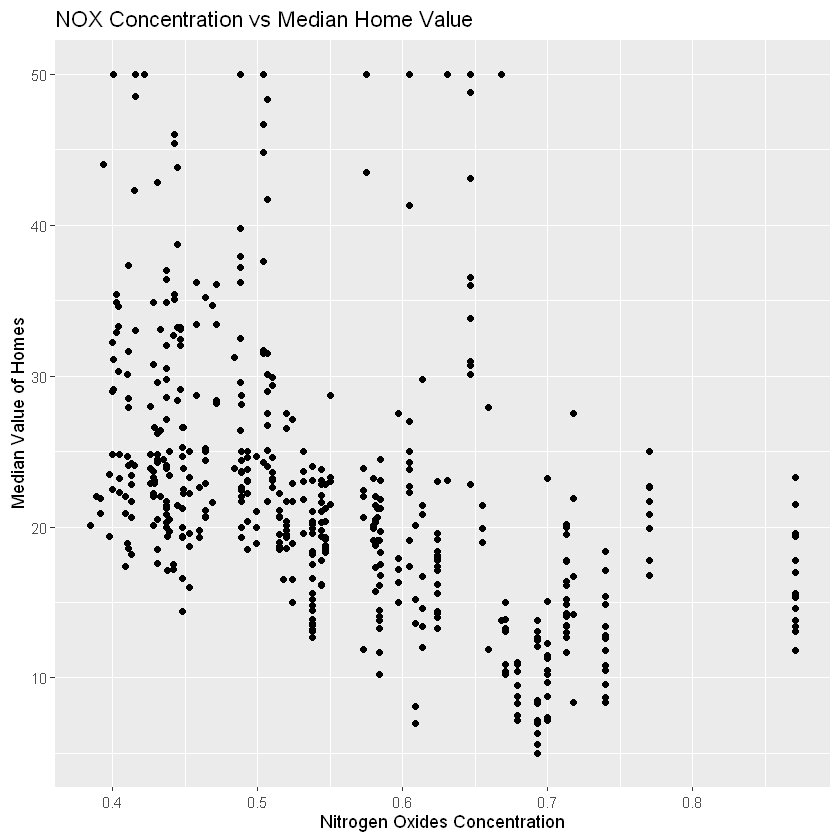

In [6]:
  ggplot(Boston, aes(x = nox, y = medv)) +
       geom_point() +
       labs(title = "NOX Concentration vs Median Home Value",
            x = "Nitrogen Oxides Concentration",
            y = "Median Value of Homes")

3. **Basic Linear Regression for Treatment Effect Estimation:**

   Let’s assume we are interested in estimating the effect of air quality (`nox`) on the median value of homes (`medv`). We will treat `nox` as our 'treatment' variable in this context.

   - Run a basic linear regression model:

In [7]:
 basic_model <- lm(medv ~ nox, data = Boston)
     summary(basic_model)


Call:
lm(formula = medv ~ nox, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.691  -5.121  -2.161   2.959  31.310 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   41.346      1.811   22.83   <2e-16 ***
nox          -33.916      3.196  -10.61   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.323 on 504 degrees of freedom
Multiple R-squared:  0.1826,	Adjusted R-squared:  0.181 
F-statistic: 112.6 on 1 and 504 DF,  p-value: < 2.2e-16


- Interpret the output, focusing on the coefficient of `nox`, which represents the estimated treatment effect.

**Conclusion of Section 1:**

You've just completed the first part of our tutorial, where you've learned how to load a dataset, perform basic explorations, and run a simple linear regression in R. The output of the regression model provides insights into the relationship between our variables of interest.

In the next section, we will extend this analysis by introducing multiple regression to control for additional variables.


**Section 2: Dealing with Confounders - Multiple Regression**

**Objective:** 

This section aims to expand our regression analysis by including additional variables, helping us control for potential confounders. This will provide a more nuanced understanding of the relationship between our treatment and outcome variables.

**Tasks and Instructions:**

1. **Introduce Multiple Regression:**

   - In multiple regression, we include more than one explanatory variable in our model. This allows us to control for other factors that might influence our dependent variable.
   - For our `Boston` dataset, we will include additional variables such as `crim` (crime rate per capita) and `rm` (average number of rooms per dwelling) to see how they affect the relationship between `nox` (nitrogen oxides concentration) and `medv` (median value of owner-occupied homes).

2. **Run a Multiple Regression Model:**


In [8]:
multiple_model <- lm(medv ~ nox + crim + rm, data = Boston)
     summary(multiple_model)



Call:
lm(formula = medv ~ nox + crim + rm, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.242  -3.203  -0.762   2.386  39.130 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -19.13263    3.24427  -5.897 6.79e-09 ***
nox         -13.21688    2.65597  -4.976 8.92e-07 ***
crim         -0.19856    0.03496  -5.680 2.28e-08 ***
rm            7.91045    0.40723  19.425  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.095 on 502 degrees of freedom
Multiple R-squared:  0.5635,	Adjusted R-squared:  0.5609 
F-statistic:   216 on 3 and 502 DF,  p-value: < 2.2e-16


   - Observe how the coefficient of `nox` changes when controlling for `crim` and `rm`. Discuss what this might imply about the relationship between air quality and housing prices.

3. **Interpret the Output:**

   - The `summary()` function provides the coefficients of the regression equation, along with statistics like R-squared and F-statistic.
   - Pay special attention to the coefficients of `nox`, `crim`, and `rm`. Interpret their meanings in the context of housing prices. For instance, how does an increase in crime rate per capita affect median home values?

4. **Visualization of Multiple Regression:**

   - Visualizing the effects in a multiple regression model can be challenging, as we're dealing with more than two dimensions. However, we can visualize the relationship between `nox` and `medv` for different levels of `crim` or `rm` using conditional plots.
   - Create a conditional plot (also known as a coplot) to visualize these relationships:


- The increase of 1 in nox will decrease median value of home by 13.21
- the increase of 1 in crim will decrease the median value of home by 0.19
- the increase of 1 in rm will increase the median value of home by 7.9
- all coefficients are statistically signficant
- the adjusted R-square for the multiple regression model is higher than the single variable model indicating it explains the variance more.
- the f-statisitc indicates that the model is statistically signicficant meaning the coefficinets present have an effect on the dependent variable

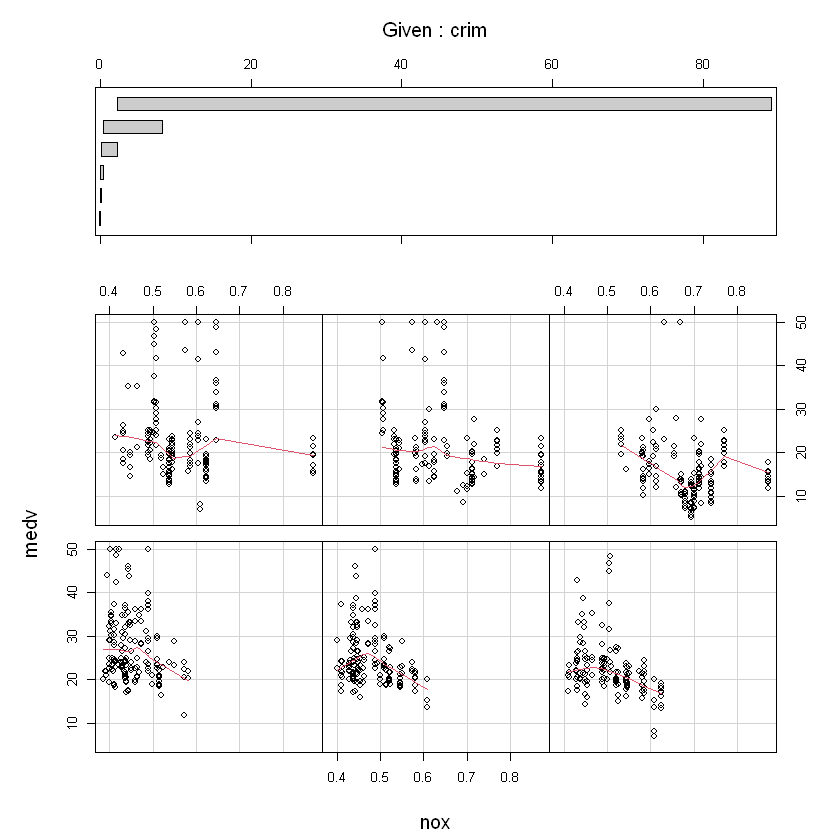

In [9]:
coplot(medv ~ nox | crim, data = Boston, panel = panel.smooth)

**Conclusion of Section 2:**

You've now learned how to extend a simple linear regression model to a multiple regression model in R, controlling for additional observable characteristics. This approach helps in isolating the effect of our treatment variable by accounting for other influencing factors.


**Section 3: Exploring Treatment Effects Under Different Assumptions**

**Objective:** 

In this section, we will explore how relaxing certain assumptions changes our approach to estimating treatment effects using regression models. We will focus on scenarios where the error terms are functions of observable characteristics.

**Tasks and Instructions:**

1. **Setting up the Scenario:**

   Let's continue using the `Boston` dataset. Recall our previous model where we considered the effect of air quality (`nox`) on median home values (`medv`). Now, we will consider additional variables that might influence `medv` and see how they affect our treatment effect estimation.

2. **Relaxing Assumption (1) - Error Terms as Functions of \( x \):**

   - Assume our error terms are now functions of other observable characteristics. We will include additional variables like `crim` (crime rate), `rm` (average number of rooms), and `age` (proportion of owner-occupied units built before 1940).
   - Run a multiple regression model including these variables:


In [10]:
     advanced_model <- lm(medv ~ nox + crim + rm + age, data = Boston)
     summary(advanced_model)



Call:
lm(formula = medv ~ nox + crim + rm + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.619  -3.088  -0.775   2.101  39.674 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -19.85495    3.24783  -6.113 1.96e-09 ***
nox          -7.84107    3.58248  -2.189   0.0291 *  
crim         -0.19315    0.03491  -5.533 5.07e-08 ***
rm            7.89054    0.40574  19.447  < 2e-16 ***
age          -0.03141    0.01411  -2.225   0.0265 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.071 on 501 degrees of freedom
Multiple R-squared:  0.5678,	Adjusted R-squared:  0.5643 
F-statistic: 164.5 on 4 and 501 DF,  p-value: < 2.2e-16


   - Interpret the results, focusing on how the coefficient of `nox` changes when controlling for other factors.

3. **Understanding the Implications:**

   - Discuss why including these additional variables is crucial in providing a more accurate estimate of the treatment effect of `nox` on `medv`.
   - Explain how omitting important variables can lead to biased estimates of treatment effects, a phenomenon known as omitted variable bias.

4. **Visualizing the Results:**

   - Create visualizations to better understand the relationships between `nox` and `medv` while controlling for other factors:


- the model is still valid than the single variable model given the f-stat and r-squared figures.
- the significance of the nox has tremendously decreased
- coefficients are "relaxed" than the previous model.

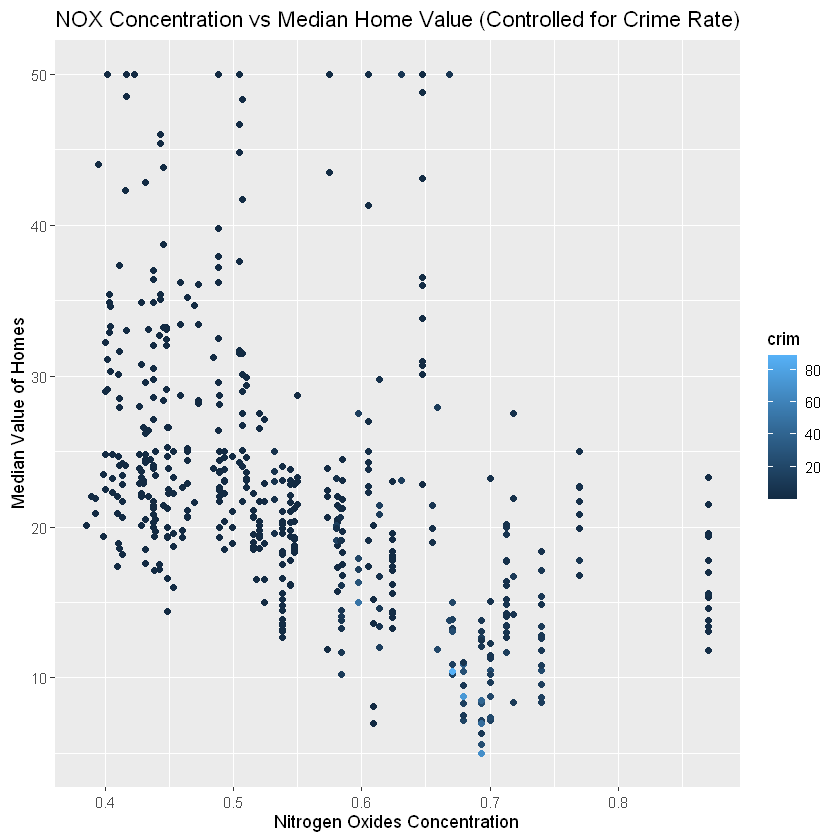

In [11]:
     ggplot(Boston, aes(x = nox, y = medv, color = crim)) +
       geom_point() +
       labs(title = "NOX Concentration vs Median Home Value (Controlled for Crime Rate)",
            x = "Nitrogen Oxides Concentration",
            y = "Median Value of Homes")


**Conclusion of Section 3:**

You have now explored how to adjust your regression models to account for additional observable characteristics, enhancing the accuracy of your treatment effect estimation. By including relevant variables, we can control for potential confounders and reduce the risk of omitted variable bias.


# Student section

**Tutorial Title: Estimating Treatment Effects with Regression in R - `mtcars` Dataset**

**Introduction:**

Welcome to our hands-on tutorial on estimating treatment effects using regression analysis in R. In this session, we'll use the `mtcars` dataset, exploring the influence of various car attributes on miles per gallon (mpg). This tutorial will reinforce your understanding of regression techniques and their application in real-world data analysis.

**Setup:**

Ensure R and RStudio are installed, and load the required packages:


In [12]:
install.packages("tidyverse")
install.packages("ggplot2")
library(tidyverse)
library(ggplot2)


Warning message:
"package 'tidyverse' is in use and will not be installed"
Warning message:
"package 'ggplot2' is in use and will not be installed"


**Section 1: Data Exploration and Simple Regression**

**Objective:** Get familiar with the `mtcars` dataset and perform a simple linear regression.

**Tasks:**

1. **Explore the `mtcars` Dataset:**
   - Load the dataset and use `head()` to view the first few rows.
   - **Hint:** `data("mtcars")` and `head(mtcars)`.


In [13]:
#### write code here #####
data("mtcars")
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


2. **Summary Statistics and Visualization:**
   - Generate summary statistics for the dataset.
   - Create a scatter plot of `wt` (weight) against `mpg`.
   - **Hint:** Use `summary(mtcars)` and `ggplot(mtcars, aes(x = wt, y = mpg)) + geom_point()`.


In [14]:
#### write code here #####
summary(mtcars)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

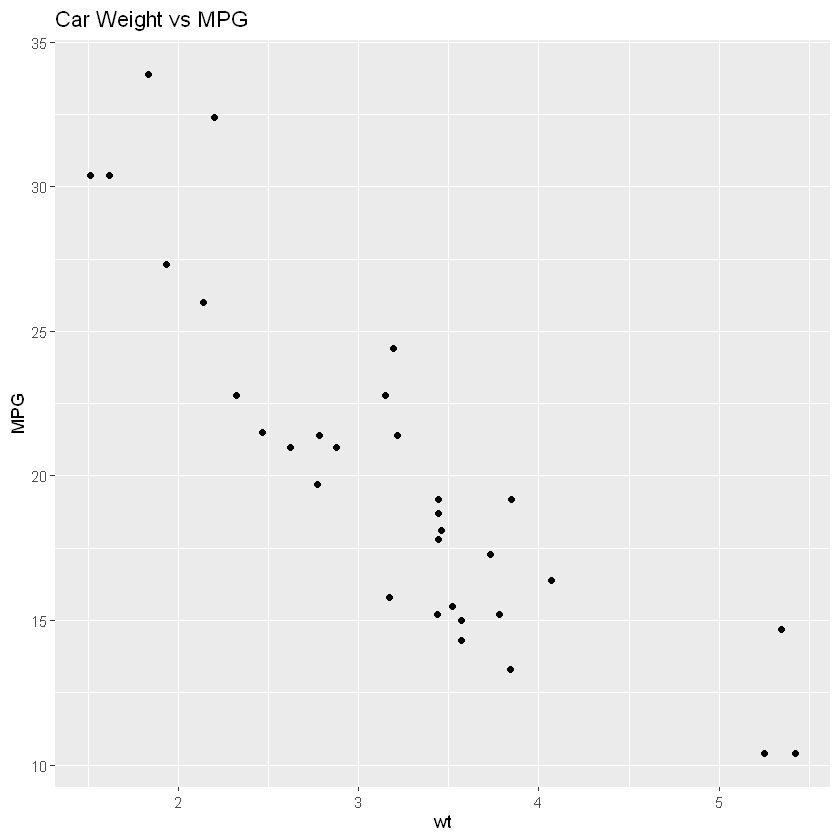

In [15]:
  ggplot(mtcars, aes(x = wt, y = mpg)) +
       geom_point() +
       labs(title = "Car Weight vs MPG",
            x = "wt",
            y = "MPG")

3. **Simple Linear Regression:**
   - Run a regression to estimate the effect of `wt` on `mpg`
  .
   - **Hint:** Use `(mpg ~ ....)s)` and `summary()` to view the results.


In [16]:
#### write code here #####
basic_model <- lm(mpg ~ wt, data = mtcars)
summary(basic_model)


Call:
lm(formula = mpg ~ wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10


**Section 3: Multiple Regression and Assumptions**

**Objective:** Explore multiple regression techniques and understand how assumptions impact model results.

**Tasks:**

1. **Multiple Regression Analysis:**
   - Extend the model to include `hp` (horsepower) and `qsec` (1/4 mile time).


In [22]:
#### write code here #####
multiple_model <- lm(mpg ~ wt + hp + qsec, data = mtcars)
     summary(multiple_model)


Call:
lm(formula = mpg ~ wt + hp + qsec, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8591 -1.6418 -0.4636  1.1940  5.6092 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 27.61053    8.41993   3.279  0.00278 ** 
wt          -4.35880    0.75270  -5.791 3.22e-06 ***
hp          -0.01782    0.01498  -1.190  0.24418    
qsec         0.51083    0.43922   1.163  0.25463    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.578 on 28 degrees of freedom
Multiple R-squared:  0.8348,	Adjusted R-squared:  0.8171 
F-statistic: 47.15 on 3 and 28 DF,  p-value: 4.506e-11


2. **Interpreting Results:**
   - Discuss how the inclusion of these variables affects the coefficient of `wt`.
   - **Hint:** Focus on the change in the coefficient and significance levels.


- the coefficient decreased slighlty
- signficnace level of the wt remained the same





3. **Visualizing Complex Relationships:**
   - Create a plot to visualize the relationship between `wt` and `mpg`, colored by `hp`.
   - **Hint:** Use `ggplot(mtcars, aes(x = wt, y = mpg, color = hp)) + geom_point()`.


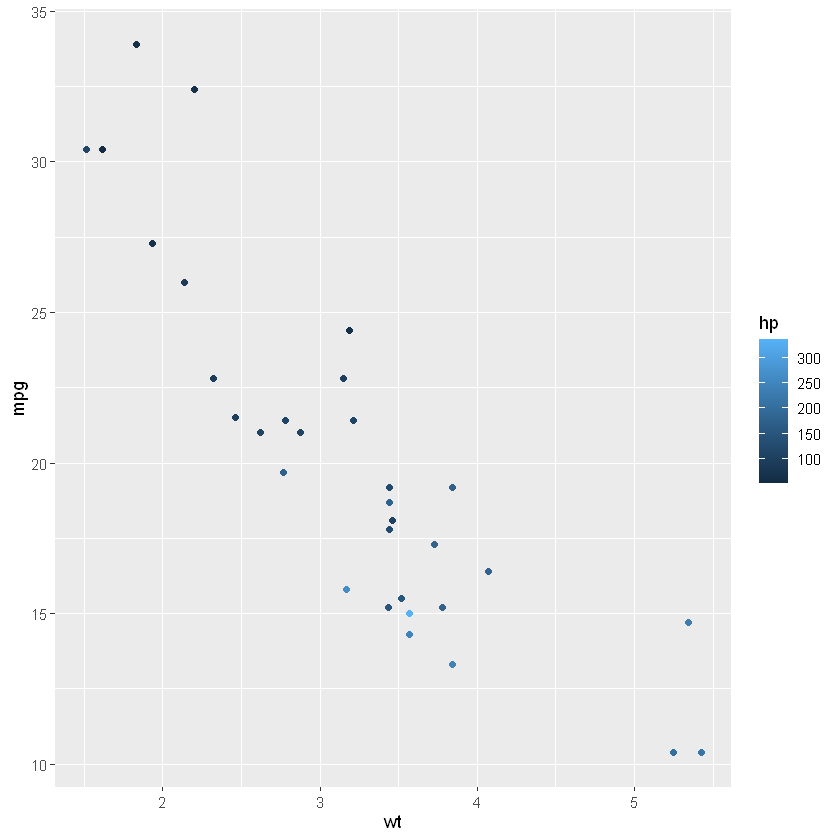

In [17]:
#### write code here #####
ggplot(mtcars, aes(x=wt,y=mpg,color=hp)) + geom_point()

**Exercise: Inspecting Conditional Independence Assumption**

**Objective:** 
Use the `mtcars` dataset to create a binary treatment variable and inspect the conditional independence assumption using regression analysis.

**Tasks:**

1. **Dataset Preparation and Binary Treatment Creation:**
   - Load the `mtcars` dataset.
   - Create a binary treatment variable based on a characteristic of the cars. For example, let's classify cars with an `mpg` (miles per gallon) greater than the median mpg as receiving treatment (1) and others as control (0).
   - **Task for Students:** Write R code to create this binary treatment variable.

2. **Regression Analysis:**
   - Perform a regression analysis with the binary treatment variable as the independent variable and another variable of interest (e.g., `wt` - weight of the car) as the dependent variable.
   - **Task for Students:** Write the regression model and interpret the results. Focus on whether the treatment seems to be independent of other variables, given the observable characteristics.

3. **Extended Regression Analysis:**
   - Extend the regression model by including other variables (e.g., `hp` - horsepower, `qsec` - 1/4 mile time) to see if the treatment effect (coefficient of the binary variable) changes significantly.
   - **Task for Students:** Write the extended regression model and compare the results with the simpler model. Discuss how the inclusion of additional variables affects the treatment effect.

**Hints for Students:**

- To create the binary treatment variable, you might use something like: `mtcars$treatment <- as.numeric(mtcars$mpg > median(mtcars$mpg))`
- For the regression model, use the `lm()` function. For example: `basic_model <- lm(wt ~ treatment, data = mtcars)`
- To interpret the results, focus on the coefficient of the `treatment` variable and its significance.
- When extending the model, include additional variables and compare the coefficients of the `treatment` variable between the two models.


In [18]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [32]:
mtcars$binary_variable <- as.numeric(mtcars$mpg > median(mtcars$mpg))

In [33]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,binary_variable
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,1
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,1
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,0
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,0


In [38]:
basic_model <- lm(wt ~ binary_variable, data = mtcars)
summary(basic_model)


Call:
lm(formula = wt ~ binary_variable, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9285 -0.4617 -0.1467  0.3310  1.5223 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.9017     0.1577  24.736  < 2e-16 ***
binary_variable  -1.4602     0.2304  -6.338 5.44e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6503 on 30 degrees of freedom
Multiple R-squared:  0.5725,	Adjusted R-squared:  0.5582 
F-statistic: 40.17 on 1 and 30 DF,  p-value: 5.442e-07


- the coefficient of the binary variable being 1 will change wt by -1.46 with statistical significance. 

In [42]:
extended_model <- lm(wt ~ binary_variable + hp + qsec, data = mtcars)
summary(extended_model)


Call:
lm(formula = wt ~ binary_variable + hp + qsec, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9796 -0.3796 -0.1067  0.2710  1.1538 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)     -2.353605   1.841077  -1.278  0.21161   
binary_variable -0.907970   0.300213  -3.024  0.00529 **
hp               0.009293   0.002884   3.223  0.00322 **
qsec             0.259585   0.082501   3.146  0.00390 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5619 on 28 degrees of freedom
Multiple R-squared:  0.7021,	Adjusted R-squared:  0.6702 
F-statistic:    22 on 3 and 28 DF,  p-value: 1.594e-07


- adding more variable shas increased the adjusted-R square while maintaining a signficiant f-stat
- coefficient from simple model to complex model decreased while also maintaining significance level of 99%